In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("IRIS.csv")

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


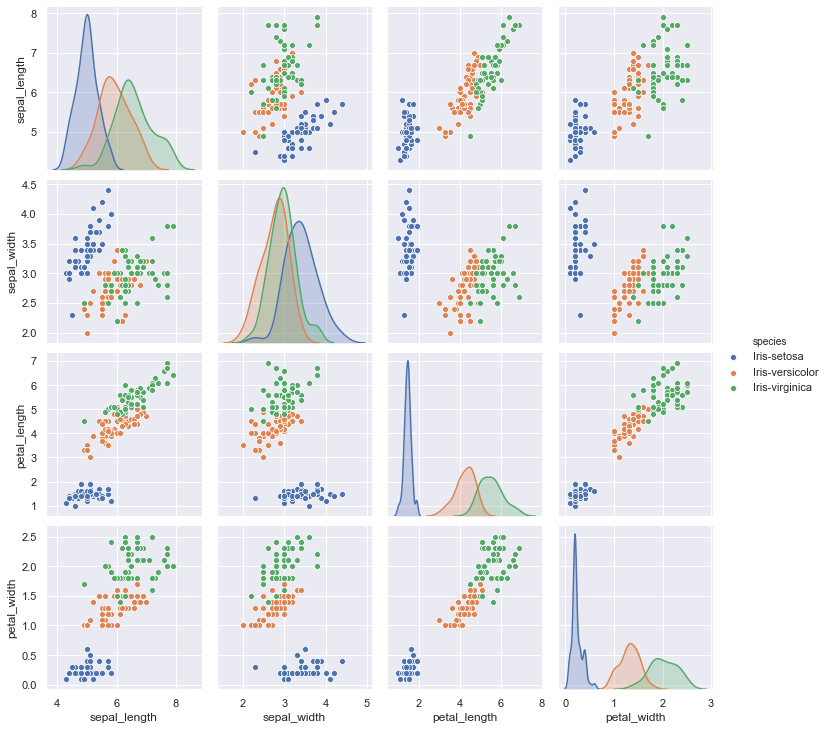

In [7]:
graph=sns.pairplot(data,hue='species')

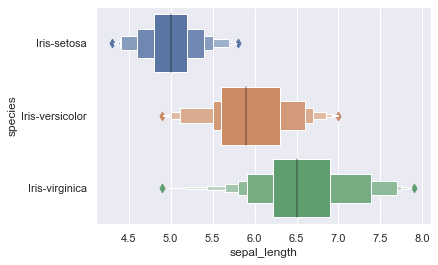

In [8]:
graph=sns.boxenplot(x='sepal_length',y='species',data=data)
plt.show()

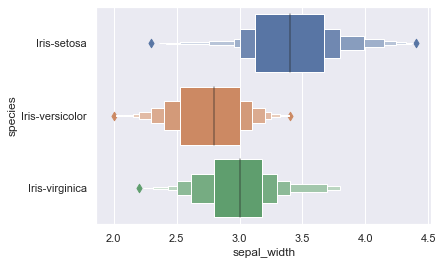

In [9]:
graph=sns.boxenplot(x='sepal_width',y='species',data=data)
plt.show()

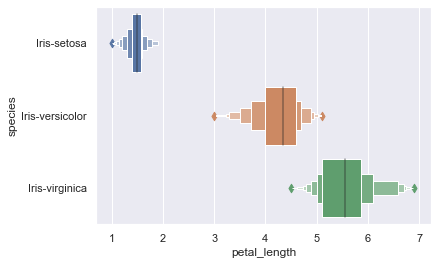

In [10]:
graph=sns.boxenplot(x='petal_length',y='species',data=data)
plt.show()

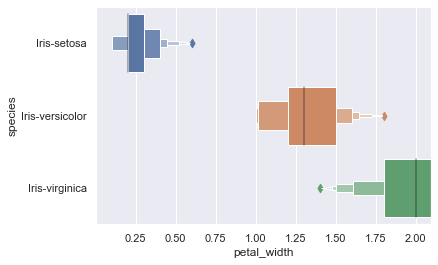

In [11]:
graph=sns.boxenplot(x='petal_width',y='species',data=data)
plt.show()

In [12]:
x=data.drop('species',axis=1)
y=data['species']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


### Prediction using KNN

Since there are no predefined statistical methods available for determining the value of 'k', we will be taking a high value of k to begin with and then calculate the accuracy score for each value of k in the range of 1-the random value taken and select the most appropriate value of k based upon the results we get.

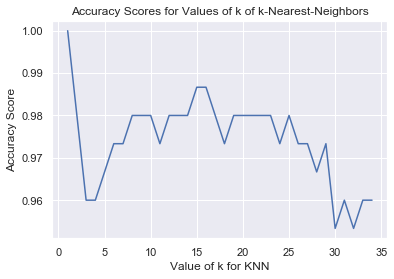

In [16]:
acc_score=[] ##for storing the accuracy of each value of k
k_range=list(range(1,35))

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k).fit(x,y)
    y_predict=knn.predict(x)
    acc_score.append(metrics.accuracy_score(y,y_predict))
    
plt.plot(k_range, acc_score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()



**Thus it is evident that accuracy score is maximum for k=15(not including k=1)**

In [17]:
knn=KNeighborsClassifier(n_neighbors=15).fit(x,y)
y_predict=knn.predict(x)
print(metrics.accuracy_score(y,y_predict))

0.9866666666666667


In [22]:
lr=LogisticRegression().fit(x,y)
y_predict=lr.predict(x)
print(metrics.accuracy_score(y,y_predict))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.96


### Splitting the data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


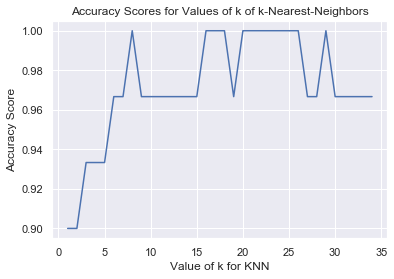

In [26]:
k_range = list(range(1,35))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

**Selecting the value of k=10 for prediction using KNN**

In [28]:
knn=KNeighborsClassifier(n_neighbors=10).fit(x,y)
print(knn.predict([[7,4,6.5,2.5]]))


['Iris-virginica']


In [29]:
lr=LogisticRegression().fit(x_train,y_train)
y_predict=lr.predict(x_test)
print(metrics.accuracy_score(y_test,y_predict))

0.9


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
